In [10]:
import numpy as np
import pandas as pd

In [11]:
data=pd.read_csv('Wholesale customers data.csv')
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [12]:
data=data.drop(['Region'],axis=1)
data=data.dropna()
data=pd.get_dummies(data)
data

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204
436,1,39228,1431,764,4510,93,2346
437,2,14531,15488,30243,437,14841,1867
438,1,10290,1981,2232,1038,168,2125


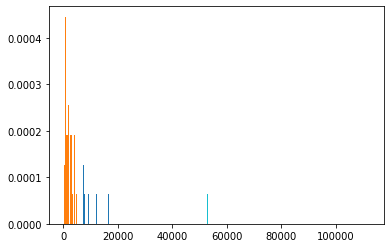

In [13]:
from numpy.random import normal
from matplotlib import pyplot
pyplot.hist(data, bins=50, density=True)
pyplot.show()

In [14]:
from numpy.random import normal
from sklearn.mixture import GaussianMixture

In [15]:
model = GaussianMixture(n_components=2, init_params='random')
model.fit(data)

GaussianMixture(covariance_type='full', init_params='random', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [16]:

# predict latent values
yhat = model.predict(data)
# check latent value for first few points
print(yhat[:100])
# check latent value for last few points
print(yhat[-100:])

[0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0]


In [32]:
probs = model.predict_proba(data)
print(probs[:5].round(3))



[[0.998 0.002]
 [0.999 0.001]
 [0.    1.   ]
 [1.    0.   ]
 [0.037 0.963]]
